In [1]:
# Types of Regression Techniques:
   # Linear Regression
   # Polynomial Regression
   # Stepwise Regression
   # Decision Tree Regression
   # Random Forest Regression
   # Support Vector Regression
   # Ridge Regression
   # Lasso Regression
   # ElasticNet Regression
   # Bayesian Linear Regression



In [6]:
# Simple linear regression
#  Simple linear regression is a regression model that estimates the relationship between one independent variable 
#   and one dependent variable using a straight line. Both variables should be quantitative.


import pandas as pd
data = pd.read_csv("C:/Users/Derya/Downloads/advertising.csv")
df = data.copy()


In [8]:
df = df.iloc[:,1:len(df)]

In [9]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [12]:
df.isnull().values.any()

False

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


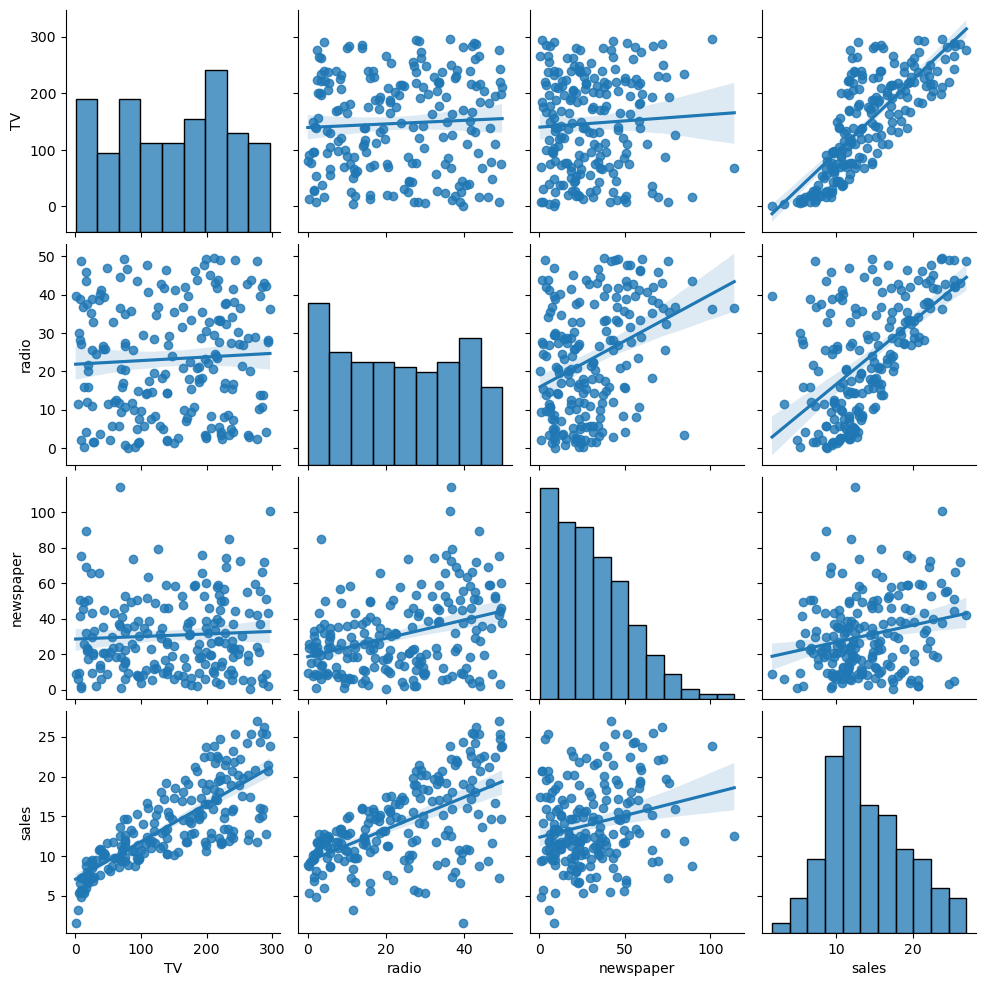

In [15]:
import seaborn as sbn
sbn.pairplot(df, kind="reg")

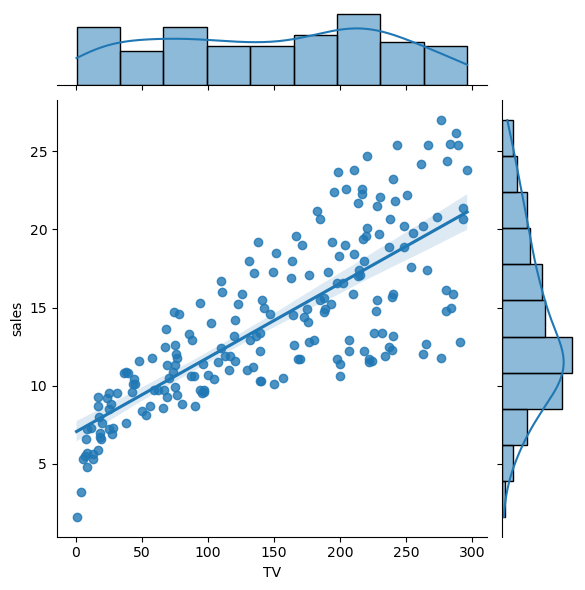

In [17]:
sbn.jointplot(x="TV",y="sales",data=df,kind="reg")

In [19]:
#  Model with Statsmodels

import statsmodels.api as sm

In [20]:
X = df[["TV"]]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
X = sm.add_constant(X)
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [22]:
y = df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
lm = sm.OLS(y,X)  
# The ordinary least squares (OLS) algorithm is a method for estimating the parameters of a linear regression model.

In [24]:
model = lm.fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        11:58:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# R-squared:How much of the variation of a dependent variable is explained by an independent variable in a regression model.
# Adj. R-squared: Adjusted R^2 is a corrected goodness-of-fit (model accuracy) measure for linear models.
  # It identifies the percentage of variance in the target field that is explained by the input or inputs.


In [27]:
import statsmodels.formula.api as smf

In [28]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        12:30:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [30]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [31]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [32]:
model.f_pvalue    # model meaning ? 

1.4673897001947095e-42

In [37]:
print("f_pvalue:", "%.7f" % model.f_pvalue)

f_pvalue: 0.0000000


In [38]:
print("fvalue:", "%.3f" % model.fvalue)

fvalue: 312.145


In [39]:
print("tvalue:", "%.4f" % model.tvalues[:1])

tvalue: 15.3603


In [40]:
model.mse_model    # model evaluation success or failure ? 

3314.6181668686486

In [42]:
model.rsquared_adj

0.6099148238341623

In [43]:
model.fittedvalues[:7]   # prediction values

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
dtype: float64

In [44]:
y[:7]                  # real values

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
Name: sales, dtype: float64

In [46]:
print("Sales=" + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales=7.03 + TV*0.05


Text(0.5, 0, 'TV Expenses')

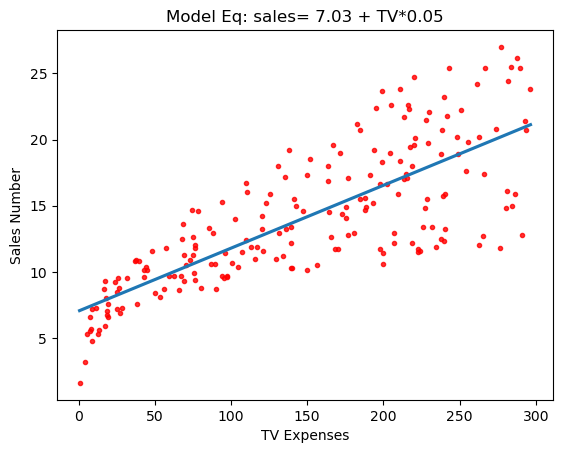

In [55]:
gd = sbn.regplot(x="TV",y="sales",data=df,ci=None, scatter_kws={"color":"r", "s":9})
gd.set_title("Model Eq: sales= 7.03 + TV*0.05")
gd.set_ylabel("Sales Number")
gd.set_xlabel("TV Expenses")



In [57]:
from sklearn.linear_model import LinearRegression

In [62]:
X =df[["TV"]]
Y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)


In [63]:
model.intercept_


7.032593549127693

In [64]:
model.coef_

array([0.04753664])

In [65]:
model.score(X,y)

0.611875050850071

In [66]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])